<a href="https://colab.research.google.com/github/someonewholikelife/tools_of_ai/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация методом k ближайших соседей

In [1]:
# Загружаем основные библиотеки
from sklearn.datasets import load_digits
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Библиотеки, необходимые для обучения модели
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
digits = load_digits()
X_data = digits.data
y_data = digits.target

Label выводимого изображения: 0


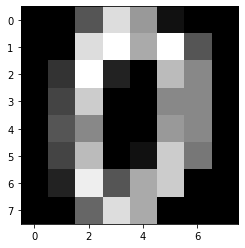

In [3]:
# Визуализируем первый элемент датасета
plt.imshow(digits.images[0], cmap='gray', interpolation='nearest')
print('Label выводимого изображения:', y_data[0])

In [4]:
# Разобъем датасет на тренеровочную и тестовую выборки в отношении 67:33
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [5]:
# Обучаем модель KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Предсказываем результаты на тестовой выборке
y_test_predict = knn.predict(X_test)

In [7]:
# Точность модели
acc = accuracy_score(y_test, y_test_predict)
print(f'Точность модели: {acc:.3%}')

Точность модели: 99.327%


In [8]:
# Основные метрики 
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        56
           4       0.98      1.00      0.99        64
           5       0.99      0.99      0.99        73
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        62
           8       1.00      1.00      1.00        52
           9       0.98      0.96      0.97        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



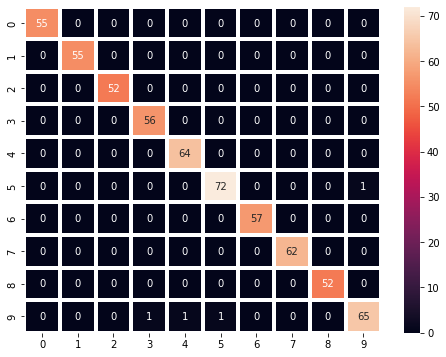

In [9]:
# Матрица путаницы
plt.figure(figsize = (8,6)) 
knc_cm = confusion_matrix(y_test,y_test_predict)
sns.heatmap(knc_cm,annot=True,fmt='d',linewidth=3)

In [22]:
# K-hold перекрестная проверка
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.98888889, 0.98888889, 0.99444444, 0.99444444, 0.97777778,
       0.97777778, 0.99444444, 1.        , 1.        , 0.96648045])

In [23]:
print(f'Tочность k-Fold модели: {scores.mean():.2%}')
print(f'Стандартное отклонение точности: {scores.std():.2%}')

Tочность k-Fold модели: 98.83%
Стандартное отклонение точности: 1.04%


In [24]:
# Подбор параметров модели
knc_params={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'],
    'n_neighbors':range(1,10)
}

In [25]:
# Нахождение параметров модели по сетке
knc = KNeighborsClassifier()
knc_GS = GridSearchCV(knc,knc_params,cv=5)
knc_GS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']})

In [26]:
print('Лучшие параметры:',knc_GS.best_params_)

Лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [27]:
# Обучение модели с ранее найденными параметрами
knc_cv = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 1, weights= 'uniform')
knc_cv.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_test_predict_cv = knc_cv.predict(X_test)
acc = accuracy_score(y_test,y_test_predict_cv)
print(f'Средняя точность: {acc:.3%}')

Средняя точность: 98.485%


In [29]:
print(classification_report(y_test,y_test_predict_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        52
           3       0.96      0.98      0.97        56
           4       0.98      0.98      0.98        64
           5       1.00      0.99      0.99        73
           6       1.00      1.00      1.00        57
           7       1.00      0.98      0.99        62
           8       0.98      0.96      0.97        52
           9       0.96      0.96      0.96        68

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.98      0.98      0.98       594



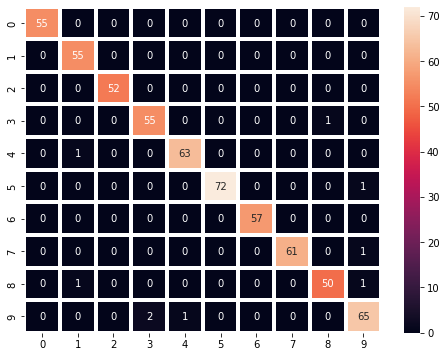

In [30]:
plt.figure(figsize = (8,6)) 
knc_cm = confusion_matrix(y_test,y_test_predict_cv)
sns.heatmap(knc_cm,annot=True,fmt='d',linewidth=3)

Лучшей моделью выступает модель без настройки гиперпараметров. Она показывает точность 99.327%